🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

Regression model for predicting the temperature by know 5 features:  
('Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)') from weatherHistory dataset

By:Mahmoud Mohamed Rady

🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

################################################  Importing libraries and packages  ##############################################

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns


################################################ Reading Dataset  ##########################################################

In [2]:
df = pd.read_csv('weatherHistory.csv')


################################################  Data Exploration and Preprocess ##############################################

In [3]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
#above we can see that there are no null or nan values in the data (no missing values)

In [6]:
#show the nature of ('Formatted Date') feature
df['Formatted Date'].unique()

array(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', ...,
       '2016-09-09 21:00:00.000 +0200', '2016-09-09 22:00:00.000 +0200',
       '2016-09-09 23:00:00.000 +0200'], dtype=object)

In [7]:
#Here we will convert the date column into three columns (day,month,year),so we can give it to the model.
#we will not use these features in the learning phase because its not important enough.

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Extract day, month, and year into separate columns
df['day'] = df['Formatted Date'].dt.day
df['month'] = df['Formatted Date'].dt.month
df['year'] = df['Formatted Date'].dt.year

# Drop the original 'Formatted Date' column if needed
# df = df.drop(columns=['Formatted Date'])

# Display the modified DataFrame
print(df[['day', 'month', 'year']])

#we will not use these features in the learning phase because its not important enough.

       day  month  year
0       31      3  2006
1       31      3  2006
2        1      4  2006
3        1      4  2006
4        1      4  2006
...    ...    ...   ...
96448    9      9  2016
96449    9      9  2016
96450    9      9  2016
96451    9      9  2016
96452    9      9  2016

[96453 rows x 3 columns]


In [8]:
df
#here we can see the date converted into 3 columns.

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,month,year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,31,3,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,31,3,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1,4,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1,4,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1,4,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9,9,2016
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9,9,2016
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9,9,2016
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9,9,2016


In [77]:
#we will show every column and searching for its type,size,having missing or not and do some visualisation.

In [9]:
df['Summary'].unique().sum()
#this feature have many catogries and its not important enough.

'Partly CloudyMostly CloudyOvercastFoggyBreezy and Mostly CloudyClearBreezy and Partly CloudyBreezy and OvercastHumid and Mostly CloudyHumid and Partly CloudyWindy and FoggyWindy and OvercastBreezy and FoggyWindy and Partly CloudyBreezyDry and Partly CloudyWindy and Mostly CloudyDangerously Windy and Partly CloudyDryWindyHumid and OvercastLight RainDrizzleWindy and DryDry and Mostly CloudyBreezy and DryRain'

In [10]:
# Assuming df is your DataFrame and 'column_name' is the column for which you want to find unique values
unique_values = df['Precip Type'].value_counts()
print(unique_values)
#we can use this feature after we encoding it with one_hot_encoder as it will be (0,1).

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64


In [11]:
df['Temperature (C)'].value_counts()
#this feature have many catogries (continous values) and it will be the feature we need to predict.

Temperature (C)
 7.222222     455
 7.777778     408
 12.777778    378
 17.777778    373
 6.111111     370
             ... 
-4.816667       1
-4.716667       1
 38.472222      1
-6.327778       1
 30.605556      1
Name: count, Length: 7574, dtype: int64

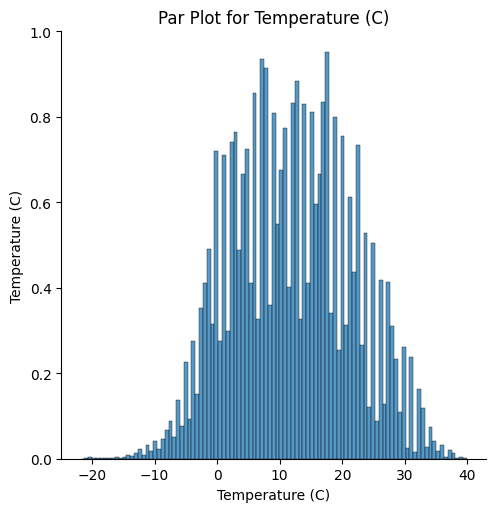

In [81]:
#show the label data which we need to predict ('Temperature')

# Replace 'Temperature (C)' with the label name to make a plot
label = 'Temperature (C)'

# Create a pair plot for the specified column
sns.pairplot(df[[label]],height=5)
plt.title(f'Par Plot for {label}')
plt.show()

#(continous values)

In [14]:
df['Apparent Temperature (C)']
#This feature is ready to be learnt (float) but its not important enough.

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 96453, dtype: float64

In [15]:
df['Humidity'].unique()
#this feature is ready to be learnt (float)

array([0.89, 0.86, 0.83, 0.85, 0.95, 0.82, 0.72, 0.67, 0.54, 0.55, 0.51,
       0.47, 0.46, 0.6 , 0.63, 0.69, 0.7 , 0.77, 0.76, 0.79, 0.62, 0.66,
       0.8 , 0.78, 0.61, 0.52, 0.4 , 0.37, 0.36, 0.43, 0.5 , 0.53, 0.58,
       0.59, 0.87, 0.93, 0.84, 0.73, 0.71, 0.74, 0.81, 0.9 , 0.99, 0.96,
       0.75, 0.88, 0.65, 0.91, 0.94, 0.92, 0.44, 0.56, 0.68, 0.64, 0.48,
       0.57, 0.98, 1.  , 0.38, 0.41, 0.45, 0.49, 0.32, 0.42, 0.35, 0.39,
       0.97, 0.34, 0.33, 0.31, 0.3 , 0.29, 0.27, 0.28, 0.26, 0.24, 0.25,
       0.23, 0.19, 0.17, 0.2 , 0.15, 0.18, 0.22, 0.14, 0.21, 0.16, 0.13,
       0.  , 0.12])

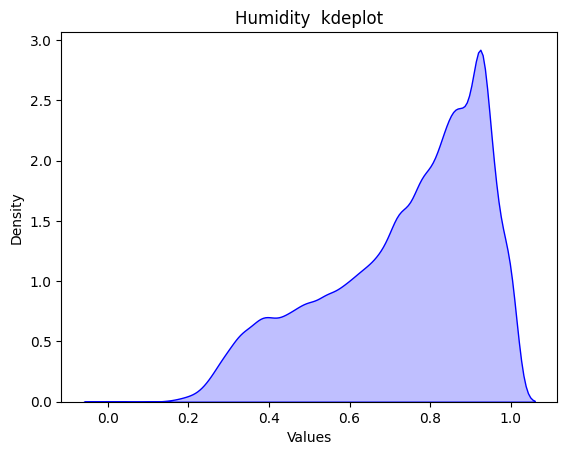

In [41]:
sns.kdeplot(df['Humidity'], color='blue', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Humidity  kdeplot')
plt.show()


In [16]:
df['Wind Speed (km/h)'].unique()
#This feature is ready to be learnt (float)

array([14.1197, 14.2646,  3.9284, ..., 37.0622, 35.5971, 30.751 ])

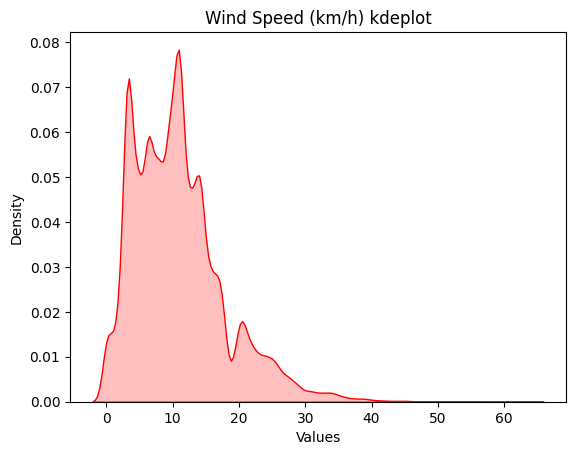

In [40]:
sns.kdeplot(df['Wind Speed (km/h)'], color='red', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Wind Speed (km/h) kdeplot')
plt.show()


In [17]:
df['Wind Bearing (degrees)']
#This feature also is ready to be learnt (float)

0        251.0
1        259.0
2        204.0
3        269.0
4        259.0
         ...  
96448     31.0
96449     20.0
96450     30.0
96451     20.0
96452     39.0
Name: Wind Bearing (degrees), Length: 96453, dtype: float64

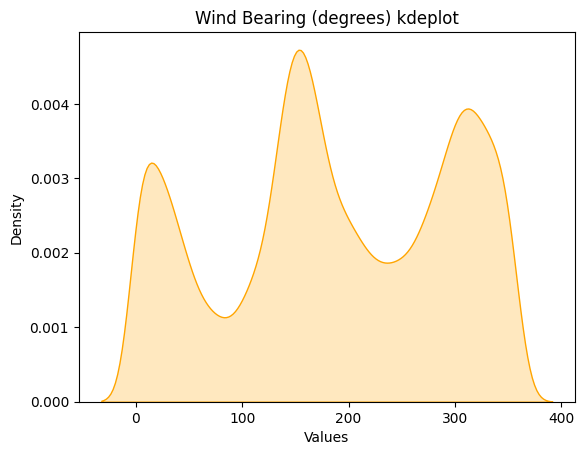

In [39]:
sns.kdeplot(df['Wind Bearing (degrees)'], color='orange', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Wind Bearing (degrees) kdeplot')
plt.show()


In [18]:
df['Visibility (km)']
#This feature also is ready to be learnt (float).

0        15.8263
1        15.8263
2        14.9569
3        15.8263
4        15.8263
          ...   
96448    16.1000
96449    15.5526
96450    16.1000
96451    16.1000
96452    15.5204
Name: Visibility (km), Length: 96453, dtype: float64

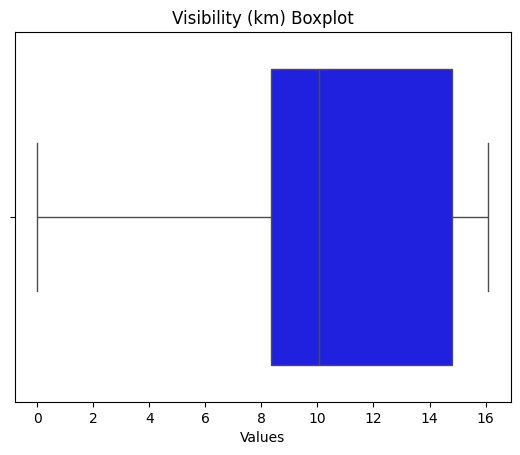

In [44]:
sns.boxplot(x=df['Visibility (km)'], color='blue')
plt.xlabel('Values')
plt.title('Visibility (km) Boxplot')
plt.show()


In [19]:
df["Loud Cover"].unique() 
#This feature is not important as it has one unique val so it has no effect.

array([0.])

In [79]:
df['Pressure (millibars)']
#This feature has a continous values and its reday to be learnt (float).
#Most values are around 1000 its not a very important feature.

0        1015.13
1        1015.63
2        1015.94
3        1016.41
4        1016.51
          ...   
96448    1014.36
96449    1015.16
96450    1015.66
96451    1015.95
96452    1016.16
Name: Pressure (millibars), Length: 96453, dtype: float64

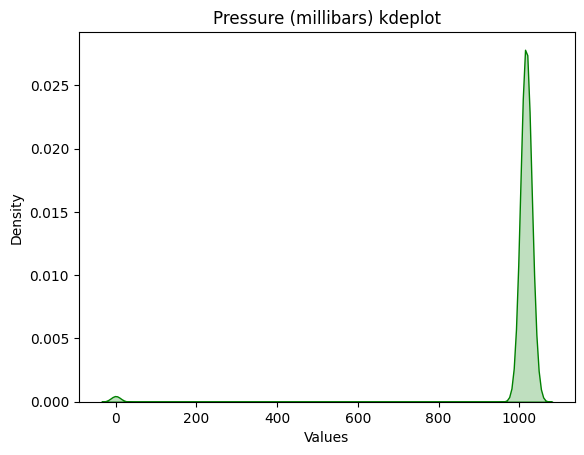

In [49]:
sns.kdeplot(df['Pressure (millibars)'], color='green', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Pressure (millibars) kdeplot')
plt.show()

In [21]:
df['Daily Summary'].value_counts()
#This feature has many categories and its not important (object).

Daily Summary
Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.      

################################################  Splitting dataset ##############################################

In [22]:
#We will put the features which suitable for learning into a var caled features.
features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

# Select relevant features and splitting the data into X,Y.
X = df[features].values
y = df['Temperature (C)'].values


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

################################################  Create the model (fitting  phase)  ##############################################

In [24]:
# Multiple Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)


In [25]:
# Polynomial Regression
degree = 2  # You can adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)


################################################  Evaluate the model (Evaluation phase) ##############################################

In [73]:
# evaluate with Mean Squared Error (MSE)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)


mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_poly = mean_absolute_error(y_test, y_pred_poly)


print(f'#######################################################')
print(f'MSE Linear Regression: {mse_linear}')
print(f'MSE Polynomial Regression (degree={degree}): {mse_poly}')
print(f'#######################################################')
print(f'MAE Linear Regression: {mae_linear}')
print(f'MAE Polynomial Regression (degree={degree}): {mae_poly}')
print(f'#######################################################')

#######################################################
MSE Linear Regression: 50.9129819846174
MSE Polynomial Regression (degree=2): 40.79377539629876
#######################################################
MAE Linear Regression: 5.7352716518083895
MAE Polynomial Regression (degree=2): 5.119110906609348
#######################################################


In [70]:
# evaluate with Root Mean Squared Error (RMSE)

print(f'#######################################################')
rmse_linear = sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_poly = sqrt(mean_squared_error(y_test, y_pred_poly))

print(f'RMSE (Linear Regression): {rmse_linear}')
print(f'RMSE (Polynomial Regression): {rmse_poly}')
print(f'#######################################################')

#######################################################
RMSE (Linear Regression): 7.135333347827374
RMSE (Polynomial Regression): 6.3870005007279245
#######################################################


In [71]:
# evaluate with Coefficient of determination (R^2)

print(f'#######################################################')
r2_linear = r2_score(y_test, y_pred_linear)
print(f'R-squared (linear Regression): {r2_linear}')

r2_poly = r2_score(y_test, y_pred_poly)
print(f'R-squared (Polynomial Regression): {r2_poly}')
print(f'#######################################################')

#######################################################
R-squared (linear Regression): 0.4438765561421548
R-squared (Polynomial Regression): 0.5544088368619333
#######################################################


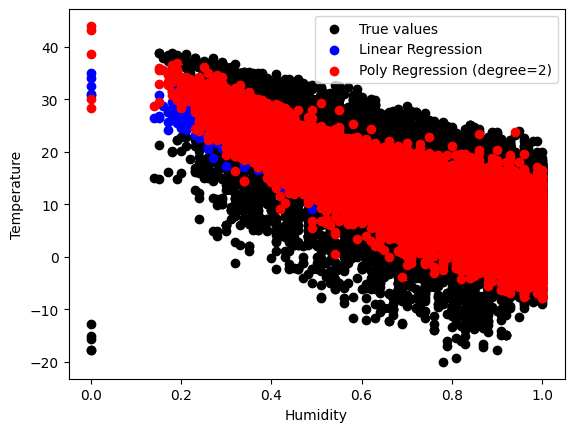

In [76]:
# Visualize predictions (Humidity with Temperature)
plt.scatter(X_test[:, 0], y_test, color='black', label='True values')
plt.scatter(X_test[:, 0], y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(X_test[:, 0], y_pred_poly, color='red', label=f'Poly Regression (degree={degree})')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend()
plt.show()

################################################  Test the model with a real data 
##############################################

In [28]:
#We will pass 5 features to the model like the 5 features it learnt

tri=((0.89,14.1197,251.0,15.8263,1015.13),) 

#this is the first 5 values in the data and the prediction should be around (9.472222)

trying = linear_reg.predict(tri)

trying
#The model should return one value (Temperature)

array([9.23405979])

Thanks.
😊 

🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 ____ Mahmoud Mohamed Rady.     ___ Junior Data Scientist  (ML Eng) ___
12/2023 ____ 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀

https://www.linkedin.com/in/mahmoud-rady-084426243